In [70]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [71]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
emails = pd.read_csv('emails.csv')

In [73]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

emails['processed'] = emails['text'].apply(preprocess)

def join_tokens(tokens):
    return ' '.join(tokens)

emails['processed_text'] = emails['processed'].apply(join_tokens)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails['processed_text'])


In [74]:
y = emails['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data = MultinomialNB()
data.fit(X_train, y_train)

y_pred = data.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.13%


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
spam = emails[emails['spam'] == 1]
non_spam = emails[emails['spam'] == 0]

In [77]:
emails['email_length'] = emails['text'].apply(len)


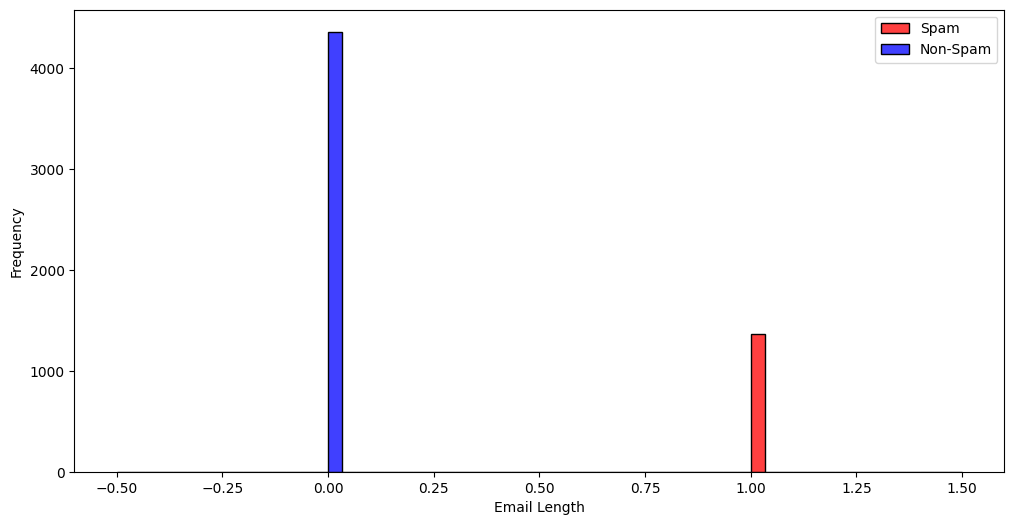

In [78]:
plt.figure(figsize=(12, 6))
sns.histplot(spam['spam'], color='red', label='Spam', bins=30)
sns.histplot(non_spam['spam'], color='blue', label='Non-Spam', bins=30)
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()



